In [1]:
!nvidia-smi

Sun Jul 14 20:28:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 649, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'benchmark', 'train', 'val', 'predict', 'track', 'export'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'classify', 'obb', 'detect', 'segment'}
                MODE (required) is one of {'benchmark', 'train', 'val', 'predict', 'track', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rcVhqOvajxQKfkmYRsLF")
project = rf.workspace("datasets-tghd8").project("teleicu4")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.57, to fix: `pip install ultralytics==8.0.196`


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/TeleICU4-2/data.yaml epochs=140 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 303MB/s]
Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/TeleICU4-2/data.yaml, epochs=140, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

In [24]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/TeleICU4-2/data.yaml

Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/TeleICU4-2/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.13s/it]
                   all         25         51      0.959      0.858       0.94      0.579
                family          6          9          1      0.775      0.881      0.484
         medical staff         12         25      0.955        0.8      0.947      0.577
               patient         17         17      0.922          1      0.992      0.677
Speed: 0.4ms preprocess, 33.0ms inference, 0.0ms loss, 35.7ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [25]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.3 source=/content/TeleICU4-2/test/images

Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/22 /content/TeleICU4-2/test/images/12frame128_jpg.rf.4d64f84a7f254ec853f3097d9c3d0d72.jpg: 640x640 1 family, 2 medical staffs, 1 patient, 37.1ms
image 2/22 /content/TeleICU4-2/test/images/12frame144_jpg.rf.428e3829101f2cd82e887f1b8bde86b2.jpg: 640x640 2 familys, 2 medical staffs, 1 patient, 37.1ms
image 3/22 /content/TeleICU4-2/test/images/13frame39_jpg.rf.45bf0e2a5694212ae29dca69e8f032e5.jpg: 640x640 1 patient, 37.0ms
image 4/22 /content/TeleICU4-2/test/images/13frame65_jpg.rf.c20e0d1129bbc7446f2e08eedf11da09.jpg: 640x640 1 patient, 37.1ms
image 5/22 /content/TeleICU4-2/test/images/1frame1600_jpg.rf.3660ae57588db2d3a1a1a1b31a509756.jpg: 640x640 1 patient, 37.1ms
image 6/22 /content/TeleICU4-2/test/images/1frame800_jpg.rf.2710cf8eaf4d5050b48647eaad1efa08.jpg: 640x640 1 medical staff, 32.2ms
image 7/22 /content

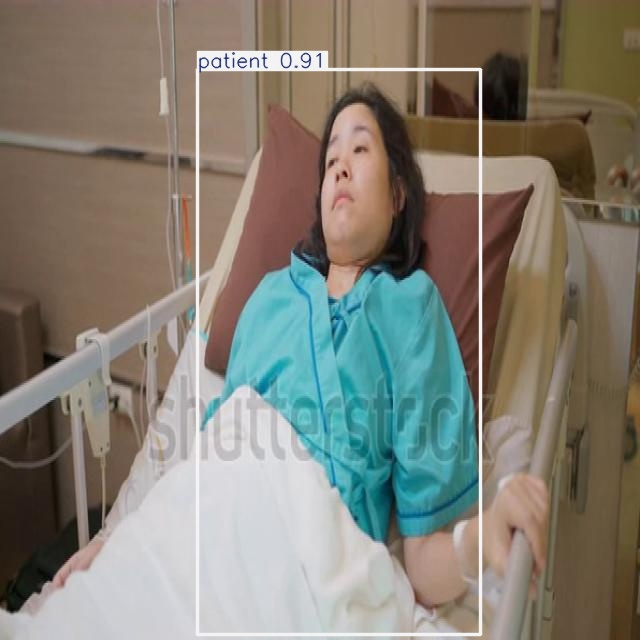

/n


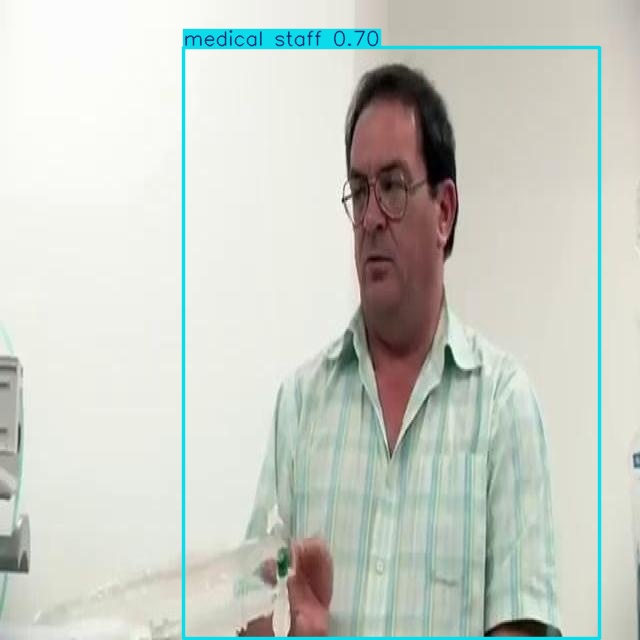

/n


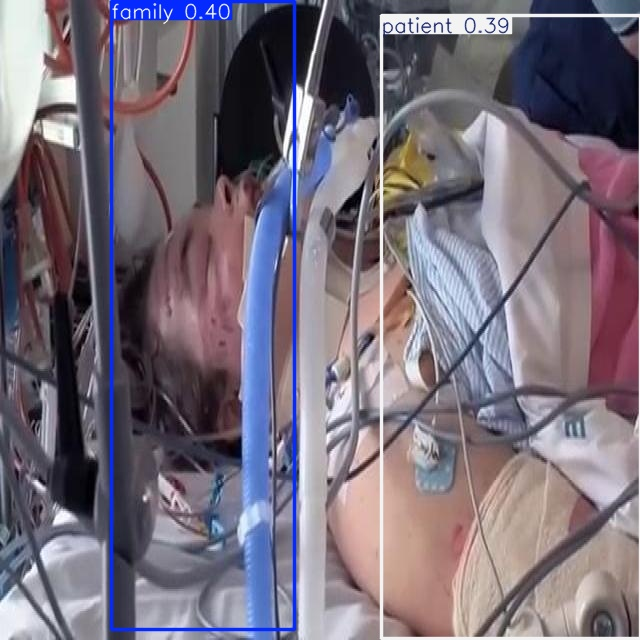

/n


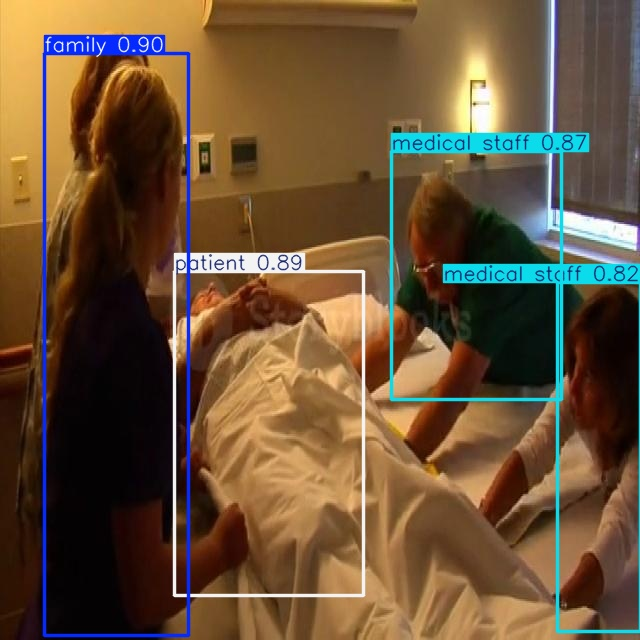

/n


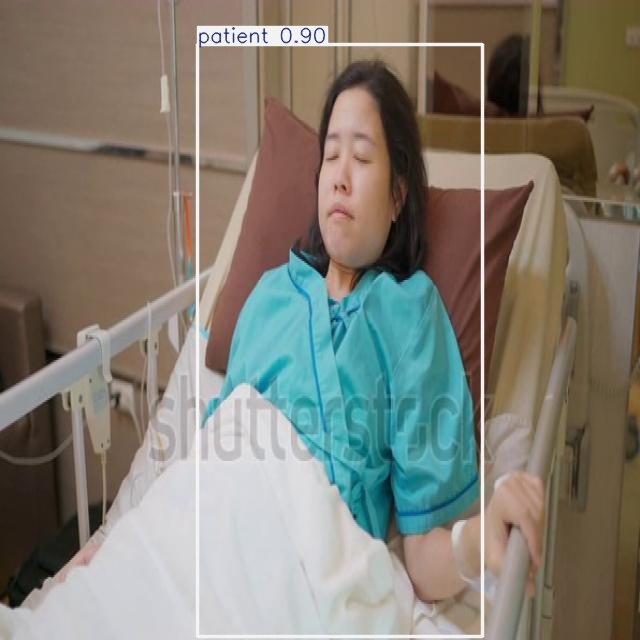

/n


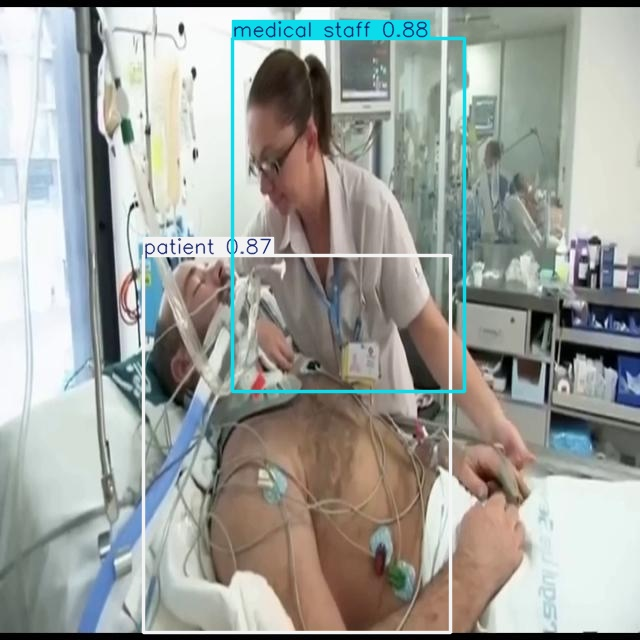

/n


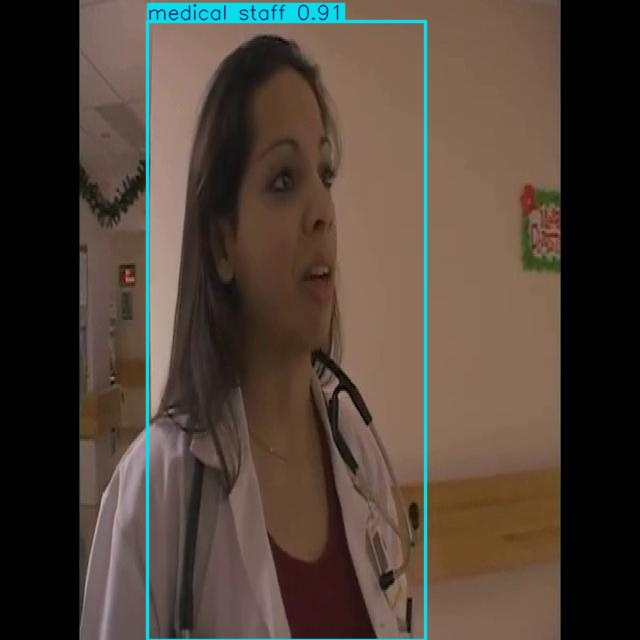

/n


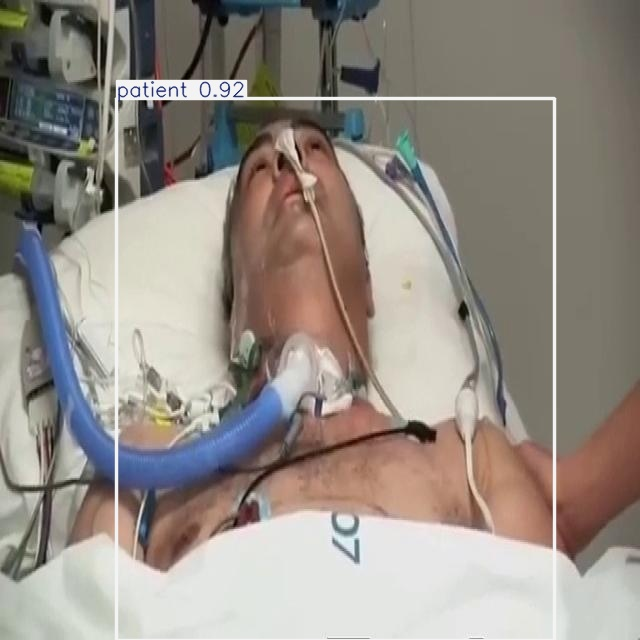

/n


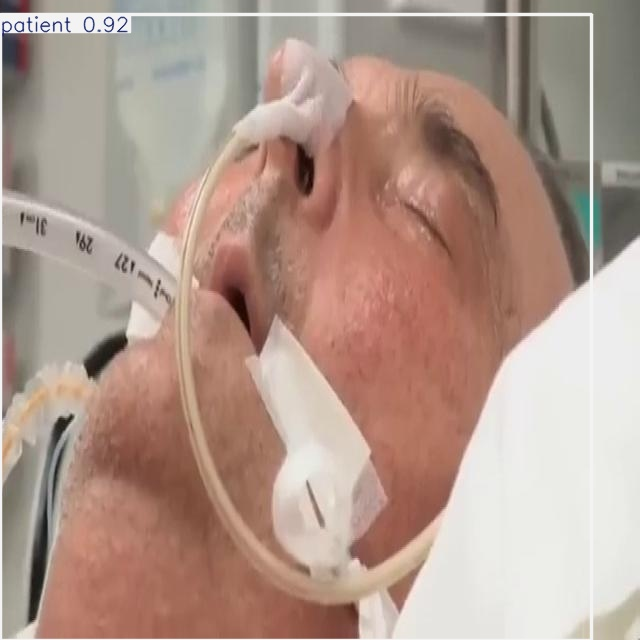

/n


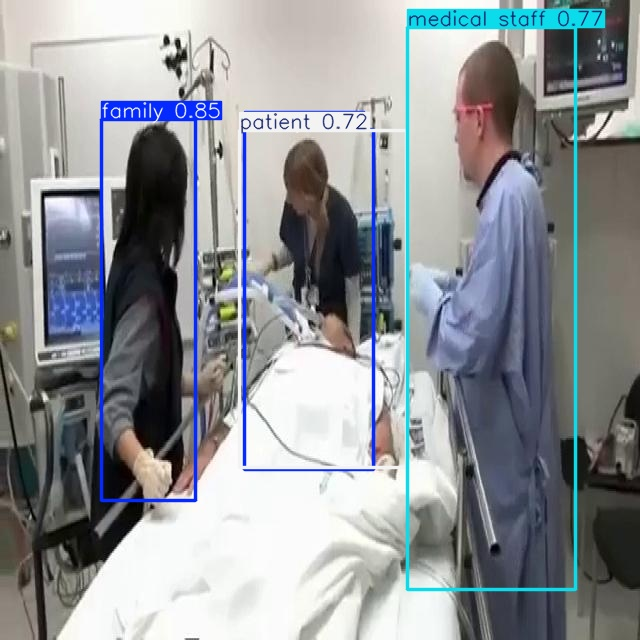

/n


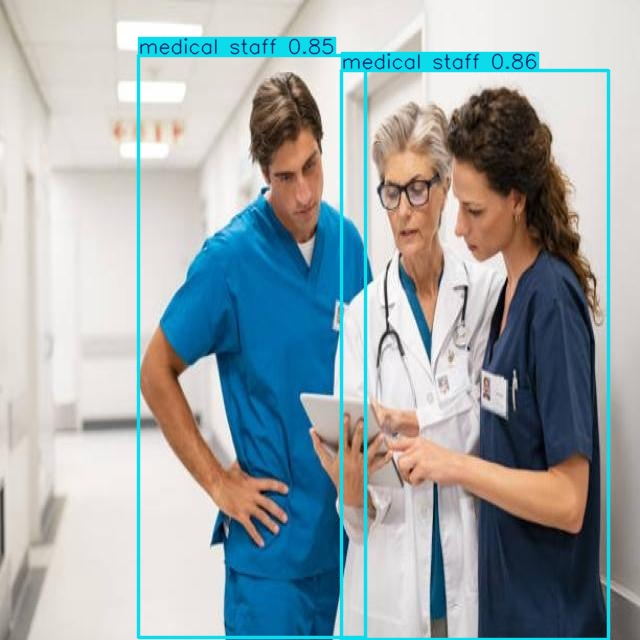

/n


In [26]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict4/*.jpg')[1:12]:
  display(Image(filename=image_path,height=600))
  print("/n")